In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<Axes: xlabel='Churn', ylabel='count'>

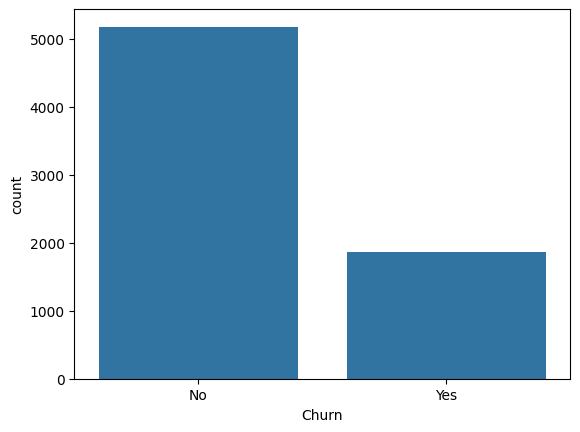

In [2]:
sns.countplot(x='Churn', data=df)

In [18]:

# Strip whitespace from columns first
df.columns = df.columns.str.strip()

if 'customerID' in df.columns:
    df = df.drop('customerID', axis=1)
else:
    print("No customerID column to drop.")


# Convert TotalCharges to numeric (coerce errors to NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing TotalCharges (and any other NaNs)
df = df.dropna()

# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Split features and target
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression(max_iter=10000, class_weight='balanced')
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))




No customerID column to drop.
Accuracy: 0.7626154939587776


Accuracy doesn't mean all that because customers do not churn, need more evaluation

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[919  96]
 [186 206]]
              precision    recall  f1-score   support

       False       0.83      0.91      0.87      1015
        True       0.68      0.53      0.59       392

    accuracy                           0.80      1407
   macro avg       0.76      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407



Based on this classification report and confusion matrix;
919 people were correctly predicted to not churn, 206 people were correctly predicted to churn, 96 were wrongly flagged as churners, 186 real churners were missed
Precision (True) = 0.68 → Of all predicted churners, 68% actually churned. 
Recall (True) = 0.53 → Of all real churners, caught 53%. 
F1 (True) = 0.59 → A balance between precision and recall. Not bad, but could be better.

Very good at catching people who won’t churn (91% recall for “No”)
Alright at catching those who will churn (53% recall for “Yes”)